In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

TOP_POSTER_LIMIT = 10
DOMAIN_LIMIT = 25
REPLIES_THRESHOLD = 150

df = pd.read_csv("data/latest-articles.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='s')
df["title"] = df["title"].astype("category")
df["posted_by"] = df["posted_by"].astype("category")
df["source_url"] = df["source_url"].astype("category")

In [2]:
# A thread is considered sourced if it has a URL link.
sourced = df[df.source_url != ""]

# This is not entirely accurate since some vanity posts have links.
vanity = df[df.source_url == ""]

In [3]:
def extract_domain(url) -> str:
    return (
        url.
            replace("www.","").
            replace("http://", "").
            replace("https://", "").
            split("/")[0]
    )


sourced.insert(len(sourced.columns)-1, "domain", (
    sourced.
        source_url.
        apply(extract_domain).
        astype("category")
))

<AxesSubplot:xlabel='count', ylabel='domain'>

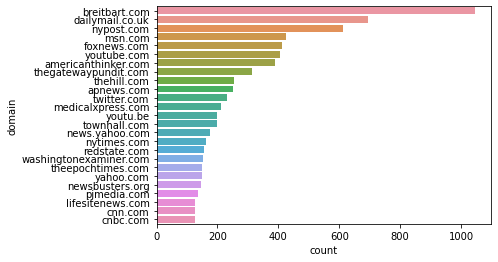

In [4]:
# Draws a chart that shows where discussion for a particular thread originated from.
data = sourced[["source_url", "domain"]].drop_duplicates()
top_sourced_domains = data.domain.value_counts().iloc[:DOMAIN_LIMIT].index
sns.countplot(
    y="domain",
    data=data,
    order=top_sourced_domains,
)

<AxesSubplot:xlabel='count', ylabel='posted_by'>

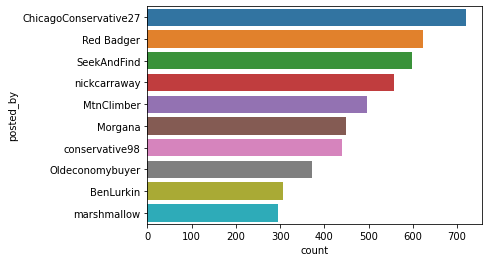

In [5]:
# Draws a chart that shows who posted a topic to be discussed that has a URL source.
data = sourced[["source_url", "posted_by"]].drop_duplicates()
top_sourced_posters = data.posted_by.value_counts().iloc[:TOP_POSTER_LIMIT].index
sns.countplot(
    y="posted_by",
    data=data,
    order=top_sourced_posters,
)

In [6]:
# Comment this if you don't want to see everything.
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Draws a table that shows which freepers posted topics from a sourced link that originated
# from a particular domain.
who_is_posting_from_what = (
    sourced[["posted_by", "source_url", "domain"]].
    query("posted_by in @top_sourced_posters and domain in @top_sourced_domains").
    drop_duplicates().
    groupby(["domain", "posted_by"])
)
who_is_posting_from_what[["domain"]].describe()

domain         \
                                              count unique   
domain                 posted_by                             
americanthinker.com    MtnClimber               238      1   
                       Red Badger                 2      1   
                       SeekAndFind               68      1   
                       conservative98             5      1   
apnews.com             conservative98             1      1   
                       Morgana                    2      1   
                       Oldeconomybuyer          160      1   
                       marshmallow                6      1   
                       nickcarraway               1      1   
breitbart.com          Red Badger                 9      1   
                       conservative98            85      1   
                       Morgana                   20      1   
                       marshmallow                5      1   
                       BenLurkin                  1      1   
                       ChicagoConservative27    483      1   
cnbc.com               Red Badger                 3      1   
                       conservative98             1      1   
                       Morgana                    2      1   
                       Oldeconomybuyer            1      1   
                       nickcarraway               2      1   
                       BenLurkin                  5      1   
                       ChicagoConservative27      1      1   
cnn.com                Red Badger                 1      1   
                       SeekAndFind                2      1   
                       conservative98             3      1   
                       Morgana                    4      1   
                       Oldeconomybuyer            2      1   
                       nickcarraway               3      1   
                       BenLurkin                 19      1   
                       ChicagoConservative27      2      1   
dailymail.co.uk        Red Badger                11      1   
                       SeekAndFind                3      1   
                       conservative98             3      1   
                       Morgana                  211      1   
                       marshmallow                1      1   
                       nickcarraway               3      1   
foxnews.com            MtnClimber                 1      1   
                       Red Badger                 5      1   
                       SeekAndFind                1      1   
                       conservative98            68      1   
                       Morgana                    8      1   
                       Oldeconomybuyer            3      1   
                       nickcarraway               1      1   
                       BenLurkin                 18      1   
                       ChicagoConservative27     33      1   
lifesitenews.com       Red Badger                 1      1   
                       Morgana                    5      1   
                       marshmallow               54      1   
medicalxpress.com      Red Badger                 8      1   
msn.com                Red Badger                 1      1   
                       SeekAndFind                9      1   
                       conservative98             1      1   
                       Oldeconomybuyer           14      1   
                       nickcarraway              10      1   
                       BenLurkin                  3      1   
news.yahoo.com         SeekAndFind                3      1   
                       conservative98             2      1   
                       Morgana                    2      1   
                       Oldeconomybuyer           27      1   
                       nickcarraway               3      1   
newsbusters.org        Red Badger                 4      1   
                       Morgana                   38      1   
nypost.com     

In [7]:
# Display which posts got the most replies before
# they aged out from the front page.

(sourced[['timestamp', 'title', 'replies']].
     loc[sourced.replies > REPLIES_THRESHOLD].
     groupby('title').
     max().
     sort_values('replies', ascending=False).
     dropna())

,timestamp,replies
title,,
Trump’s Statement On FBI Raid At His Mar-A-Lago Home,2022-08-09 01:32:51,526.0
"Trump drops major hints on possible 2024 presidential run, in culture war-tinged TPUSA speech",2022-07-24 11:29:49,281.0
DOJ briefing 8/11/22 Live thread,2022-08-11 19:41:40,245.0
Woo hoo!! I'm hooooome!!,2022-08-14 02:25:49,230.0
Freeper show of hands,2022-07-29 01:30:08,215.0
World's Greatest Welfare Queen Dies,2022-09-09 10:38:32,210.0
Jack Posobiec: Has every GOP elected leader denounced the raid on Mar-a-Lago yet? We are watching,2022-08-09 03:08:51,204.0
What are the three best science fiction books ever written?,2022-08-13 20:28:16,182.0
Former Japanese PM Abe Shinzo collapses (Shot while giving a campaign speech),2022-07-08 06:41:35,180.0
